# Mathematical Optimization

Mathematical Optimization deals with the problem of finding numerically minimums (or maximums or zeros) of a function. In this context, the function is called **cost function**, **objective function** or **energy**.

### Dimensionality of the problem

The scale of an optimization problem is set by the dimensionality of the problem, i.e. the number of scalar variables on which the search is performed. **Optimizing smooth function is easier**

Types of problems
* Convex vs non-convex
* Smooth vs non-smooth
* Noisy vs non-noisy
* Optimization under constraints or without them.

#### Brent’s method 
**On a quadratic function ** it converges in 3 iterations, as the quadratic approximation is then exact. Brent’s method on a **non-convex function**,  the fact that the optimizer avoided the local minimum is a matter of luck.

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [11]:
from scipy import optimize

def f_cuadratic(x):
    return -np.exp(-(x - .7)**2)

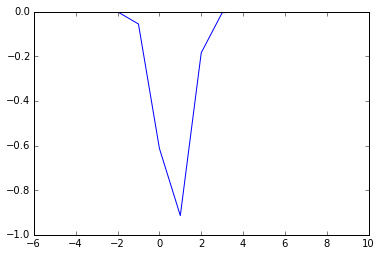

In [12]:
x = np.arange(-5,10)
plt.plot(x, f_cuadratic(x))

In [8]:
x_min = optimize.brent(f)
print x_min
print x_min - .7

0.699999999784
-2.16059059532e-10


## Gradient based methods

At a theoretical level, gradient descent is an algorithm that minimizes functions. Given a function defined by a ser of parameters, gradient descent starts with an initial set of parameters values and iteratively moves toward a set of parameters values that minimize the function.Gradient descent basically consists in taking small steps in the direction of the gradient, that is the direction of the steepest descent; taking steps in the negative direction of the function gradient. The core problem of gradient-methods on ill-conditioned problems is that the gradient tends no to point in the direction of the minimum. To run gradient descent on an error function, we first need to compute its gradient. The gradient will act like a compass and always point us downhill.

Ideas from http://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

** Important concepts **
* **Convexity**: several local minima? (stochastic gradient search)
* **Performance**: Number of iterations? (line search can reduce the number of iterations)
* **Convergence**: How to detect? Small changes in error iteration (e.g., where the gradient descent is near zero)

Ideas from http://iamtrask.github.io/2015/07/27/python-network-part2/

**Oversimplified Gradient Descent Algorithm**

1. Calculate slope at current position
2. If slope is negative, move right
3. If slope is positive, move left
4. (Repeat until slope == 0)

**Naive Gradient Descent**

1. Calculate "slope" at current "x" position
2. Change x by the negative of the slope. (x = x - slope)
3. (Repeat until slope == 0)

**Improved Gradient Descent**

*Initializaton*: alpha = 0.1 (or some number between 0 and 1)
1. Calculate "slope" at current "x" position
2. x = x - (alpha*slope)
3. (Repeat until slope == 0)

In [7]:
from IPython.display import IFrame
IFrame('https://en.wikipedia.org/wiki/Preconditioner', width=800, height=400)

## Conjugate gradient descent

Some gradient descent algorithms are toys not to be used on real problems. One of the problems of the simple gradient descent algorithms, is that they tend to oscilate across a valley, each time following the direciton of the g.radient, that makes it cross the valley. The conjugate gradient solves this problem by adding a friction term: each step depends on the two last values on the gradiend and shart turns to be reduced. 

These methods need the gradient of the function. They can compute it, but will perform better if you can pass them the gradient

In [13]:
def f(x):
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2) ** 2

In [15]:
optimize.fmin_cg(f, [2,2])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 120
         Gradient evaluations: 30


array([ 0.99998968,  0.99997855])

In [18]:
def fprime(x): # The rosenbrock function
    return np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

In [19]:
# Only 30 evaluations, compared with 120 without gradient
optimize.fmin_cg(f, [2,2], fprime=fprime)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 30
         Gradient evaluations: 30


array([ 0.99999199,  0.99998336])

In [20]:
def compute_error(b,m, points):
    total_error = 0
    for i in range(0, len(points)):
        totalError += (points[i].y - (m * points[i].x + b)**2)
    return total_error / float(len(points))

In [21]:
def step_gradient(b_current, m_current, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        b_gradient += -(2/N) * (points[i].y - ((m_current*points[i].x) + b_current))
        m_gradient += -(2/N) * points[i].x * (points[i].y - ((m_current * points[i].x) + b_current))

    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]

In [22]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

## Gradient descent algorithm
Reference: http://www.bogotobogo.com/python/python_numpy_batch_gradient_descent_algorithm.php

In [24]:
import random
from sklearn.datasets.samples_generator import make_regression
from scipy import stats

In [35]:
def gradient_descent(alpha, x, y, numIterations):
    m = x.shape[0] # number of samples
    theta = np.ones(2)
    x_transpose = x.transpose()
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2*m) # cost
        print "iter %s | J: %.3f" % (iter,J)
        gradient = np.dot(x_transpose, loss) / m
        theta = theta - alpha * gradient
    return theta

In [36]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, random_state=0, noise = 35)
m,n = np.shape(x)
x = np.c_[ np.ones(m), x] # insert column
alpha = 0.01 # learning rate
theta = gradient_descent(alpha, x, y, 1000)

iter 0 | J: 1604.873
iter 1 | J: 1586.636
iter 2 | J: 1568.768
iter 3 | J: 1551.261
iter 4 | J: 1534.107
iter 5 | J: 1517.301
iter 6 | J: 1500.833
iter 7 | J: 1484.699
iter 8 | J: 1468.890
iter 9 | J: 1453.401
iter 10 | J: 1438.224
iter 11 | J: 1423.354
iter 12 | J: 1408.785
iter 13 | J: 1394.509
iter 14 | J: 1380.522
iter 15 | J: 1366.817
iter 16 | J: 1353.389
iter 17 | J: 1340.232
iter 18 | J: 1327.341
iter 19 | J: 1314.710
iter 20 | J: 1302.334
iter 21 | J: 1290.207
iter 22 | J: 1278.325
iter 23 | J: 1266.683
iter 24 | J: 1255.276
iter 25 | J: 1244.100
iter 26 | J: 1233.148
iter 27 | J: 1222.418
iter 28 | J: 1211.904
iter 29 | J: 1201.602
iter 30 | J: 1191.507
iter 31 | J: 1181.617
iter 32 | J: 1171.926
iter 33 | J: 1162.430
iter 34 | J: 1153.126
iter 35 | J: 1144.009
iter 36 | J: 1135.076
iter 37 | J: 1126.323
iter 38 | J: 1117.747
iter 39 | J: 1109.343
iter 40 | J: 1101.109
iter 41 | J: 1093.041
iter 42 | J: 1085.135
iter 43 | J: 1077.389
iter 44 | J: 1069.799
iter 45 | J: 1062.36